# WeatherPy
----



In [88]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [89]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [90]:
# Save url information
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&units=imperial" + "&q="

# Get weather data for all the random cities, generated in the list cities.

# Creating empty lists to store the data
city_name = []
lat = []
long = []
max_temp = []
humidity = []
cloudines = []
wind_speed = []
country = []
date = []


print("--------------------------") 
print("Beginning Data Retrieval  ")
print("--------------------------")

# Creating counts
Record_count = 0
myset_count = 1

for city in cities:
    try:

        weather_json = requests.get(query_url + city).json()
#         print(json.dumps(weather_json, indent=4, sort_keys=True))
        city_name.append(weather_json["name"])
        lat.append(weather_json["coord"]["lat"])
        long.append(weather_json["coord"]["lon"])
        max_temp.append(weather_json["main"]["temp_max"])
        humidity.append(weather_json["main"]["humidity"])
        cloudines.append(weather_json["clouds"]["all"])
        wind_speed.append(weather_json["wind"]["speed"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        Record_count+=1
        print(f"Processing Record {Record_count} of Set {myset_count} | {city}")
#         After 50 requests the program will "sleep" for 60 seconds, so it will not reach the limit of 60 rpm
        if Record_count == 50:
              time.sleep(1)
              Record_count = 0
              myset_count+=1
                
    except KeyError:
        print("City not found. Skipping...")
              
print("--------------------------")              
print("Data Retrieval Complete")
print("--------------------------")
              


--------------------------
Beginning Data Retrieval  
--------------------------
Processing Record 1 of Set 1 | severo-kurilsk
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | napierville
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | pueblo nuevo
City not found. Skipping...
Processing Record 7 of Set 1 | namibe
Processing Record 8 of Set 1 | ust-maya
Processing Record 9 of Set 1 | kholodnyy
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | auki
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | lavrentiya
Processing Record 15 of Set 1 | polyarnyy
Processing Record 16 of Set 1 | yaan
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | upernavik
Processing Record 20 of Set 1 | tambura
Processing Record 21 of Set 1 | kodiak
Processing Record 22 of Set 1 | tho

Processing Record 41 of Set 4 | hithadhoo
City not found. Skipping...
Processing Record 42 of Set 4 | mackenzie
Processing Record 43 of Set 4 | vermilion
Processing Record 44 of Set 4 | lebu
City not found. Skipping...
Processing Record 45 of Set 4 | cabo san lucas
Processing Record 46 of Set 4 | lagoa
City not found. Skipping...
Processing Record 47 of Set 4 | coeneo
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 48 of Set 4 | loreto
Processing Record 49 of Set 4 | roald
Processing Record 50 of Set 4 | aykhal
Processing Record 1 of Set 5 | koslan
Processing Record 2 of Set 5 | luganville
Processing Record 3 of Set 5 | nizwa
Processing Record 4 of Set 5 | lovozero
Processing Record 5 of Set 5 | arlit
Processing Record 6 of Set 5 | abu samrah
Processing Record 7 of Set 5 | nabire
Processing Record 8 of Set 5 | guerrero negro
Processing Record 9 of Set 5 | pisco
Processing Record 10 of Set 5 | saint-francois
Processing Record 11 of S

Processing Record 24 of Set 8 | malakal
Processing Record 25 of Set 8 | leeton
Processing Record 26 of Set 8 | mabaruma
City not found. Skipping...
Processing Record 27 of Set 8 | lac du bonnet
Processing Record 28 of Set 8 | hualmay
Processing Record 29 of Set 8 | zhanaozen
Processing Record 30 of Set 8 | maarianhamina
Processing Record 31 of Set 8 | vila velha
Processing Record 32 of Set 8 | stornoway
Processing Record 33 of Set 8 | bandar-e lengeh
Processing Record 34 of Set 8 | cockburn town
Processing Record 35 of Set 8 | garowe
Processing Record 36 of Set 8 | mitsamiouli
Processing Record 37 of Set 8 | trincomalee
Processing Record 38 of Set 8 | lucapa
Processing Record 39 of Set 8 | kheri
Processing Record 40 of Set 8 | cedar city
Processing Record 41 of Set 8 | young
Processing Record 42 of Set 8 | livingstone
Processing Record 43 of Set 8 | nuuk
Processing Record 44 of Set 8 | kawalu
City not found. Skipping...
City not found. Skipping...
Processing Record 45 of Set 8 | espera

City not found. Skipping...
Processing Record 4 of Set 12 | santa cruz
Processing Record 5 of Set 12 | choma
Processing Record 6 of Set 12 | ocos
Processing Record 7 of Set 12 | roros
Processing Record 8 of Set 12 | pimentel
Processing Record 9 of Set 12 | vieste
Processing Record 10 of Set 12 | waitara
Processing Record 11 of Set 12 | zhiryatino
--------------------------
Data Retrieval Complete
--------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [91]:
# Creating and displaying the DataFrame
data_df = pd.DataFrame({"City": city_name,
                        "Lat": lat,
                        "Lng": long,
                        "Max Temp": max_temp,
                        "Humidity": humidity,
                        "Cloudiness": cloudines,
                        "Wind Speed": wind_speed,
                        "Country": country,
                        "Date": date})
data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Severo-Kuril'sk,50.68,156.12,53.11,93,99,15.26,RU,1596946504
1,Rikitea,-23.12,-134.97,70.88,69,51,20.09,PF,1596946256
2,Napierville,45.19,-73.40,66.00,87,89,4.85,CA,1596946504
3,Barrow,71.29,-156.79,50.00,81,90,10.29,US,1596946504
4,Kapaa,22.08,-159.32,80.60,78,90,17.22,US,1596946505
...,...,...,...,...,...,...,...,...,...
556,Røros,62.57,11.38,44.60,100,31,4.70,NO,1596946560
557,Pimentel,-6.84,-79.93,59.81,90,74,9.55,PE,1596946560
558,Vieste,41.88,16.18,73.40,78,0,8.05,IT,1596946560
559,Waitara,-38.92,174.25,52.00,86,85,11.01,NZ,1596946560


In [92]:
# Exporting the city data into a .csv.
data_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [93]:
# Sorting the humidity column, so we can visually check if there are cities that have humidity > 100%.
data_df = data_df.sort_values("Humidity", ascending = False)
data_df
# The current data, doesnt have cities with humidity >100%, so this step schould be skipped, 
# however since we are working with random cities, our cities data will change each time we run the script
# so the following code is introduced to ensure consistency
data_df = data_df.loc[data_df["Humidity"]<=100]
data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
148,Klaksvík,62.23,-6.59,50.00,100,90,10.29,FO,1596946516
528,Sept-Îles,50.20,-66.38,63.00,100,75,2.24,CA,1596946556
70,Morón,-34.65,-58.62,62.01,100,96,4.70,AR,1596946510
379,Mariehamn,60.10,19.93,59.00,100,32,2.24,AX,1596946534
316,Grindavik,63.84,-22.43,50.00,100,90,26.40,IS,1596946530
...,...,...,...,...,...,...,...,...,...
173,Jiuquan,39.74,98.52,86.32,14,1,4.61,CN,1596946518
478,Dongsheng,39.82,109.98,87.28,13,0,15.82,CN,1596946548
320,Shache,38.42,77.24,94.28,12,68,6.76,CN,1596946530
389,Cedar City,37.68,-113.06,73.40,11,1,6.93,US,1596946535


In [94]:
# Calculating and printing the potential outliers
quartilles = data_df["Humidity"].quantile([.25,.5,.75]).round(3)
lowerq = quartilles[0.25].round(2)
upperq = quartilles[0.75].round(2)
iqr = round(quartilles[0.75] - quartilles[0.25],2).round(2)
lower_bound = round(quartilles[0.25] - (1.5*iqr),2)
upper_bound = round(quartilles[0.75] + (1.5*iqr),2)
        
print("----------------------")
print(f"The lower quartile is: {lowerq} and the upper quartile is: {upperq}")
print(f"The potential outliers are the values below {lower_bound} and the values above {upper_bound}")
print("----------------------")

----------------------
The lower quartile is: 64.0 and the upper quartile is: 87.0
The potential outliers are the values below 29.5 and the values above 121.5
----------------------


In [95]:
# Makeing a new DataFrame equal to the city data to drop all humidity outliers by index.
otlierindexes = (data_df.loc[(data_df["Humidity"] < lower_bound) | (data_df["Humidity"] > upper_bound)]).index
clean_city_data = data_df.drop(otlierindexes, inplace = False)             
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
148,Klaksvík,62.23,-6.59,50.00,100,90,10.29,FO,1596946516
528,Sept-Îles,50.20,-66.38,63.00,100,75,2.24,CA,1596946556
70,Morón,-34.65,-58.62,62.01,100,96,4.70,AR,1596946510
379,Mariehamn,60.10,19.93,59.00,100,32,2.24,AX,1596946534
316,Grindavik,63.84,-22.43,50.00,100,90,26.40,IS,1596946530
...,...,...,...,...,...,...,...,...,...
422,Pecos,31.42,-103.49,87.80,33,1,18.34,US,1596946541
453,Chernyshevskiy,63.01,112.47,77.25,33,96,6.15,RU,1596946545
321,Baykit,61.67,96.37,81.36,32,10,3.09,RU,1596946470
99,Pervomayskoye,43.92,46.71,83.57,32,0,4.52,RU,1596946511


In [96]:
# Extract relevant fields from the data frame
clean_city_data_rel = clean_city_data[["City", 
                                       "Lat", 
                                       "Max Temp", 
                                       "Humidity",
                                       "Cloudiness", 
                                       "Wind Speed"]]
clean_city_data_rel

# Export the City_Data into a csv
output_data_file2 = "../output_data/relevant_cities_data.csv"
clean_city_data_rel.to_csv(output_data_file2)

clean_city_data_rel

,City,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
148,Klaksvík,62.23,50.00,100,90,10.29
528,Sept-Îles,50.20,63.00,100,75,2.24
70,Morón,-34.65,62.01,100,96,4.70
379,Mariehamn,60.10,59.00,100,32,2.24
316,Grindavik,63.84,50.00,100,90,26.40
...,...,...,...,...,...,...
422,Pecos,31.42,87.80,33,1,18.34
453,Chernyshevskiy,63.01,77.25,33,96,6.15
321,Baykit,61.67,81.36,32,10,3.09
99,Pervomayskoye,43.92,83.57,32,0,4.52


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

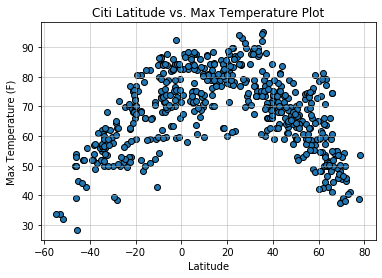

In [97]:
#creating scatter plot from clean_city_data_rel
plt.scatter(
    clean_city_data_rel["Lat"],
    clean_city_data_rel["Max Temp"],
    marker="o",
    edgecolors="black",
    facecolors="#1f77b4")

# Adding x labels, y labels and grid
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Citi Latitude vs. Max Temperature Plot")
plt.grid(linestyle ="-", linewidth = 1, alpha = 0.5)

# Save and show the scatter plot graph
plt.savefig("../output_data/Lat_vs_Temp_plot.png")
plt.show()

## Latitude vs. Humidity Plot

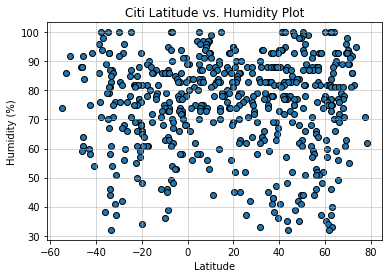

In [98]:
#creating scatter plot from clean_city_data_rel
plt.scatter(
    clean_city_data_rel["Lat"],
    clean_city_data_rel["Humidity"],
    marker="o",
    edgecolors="black",
    facecolors="#1f77b4")

# Adding x labels, y labels and grid
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Citi Latitude vs. Humidity Plot")
plt.grid(linestyle ="-", linewidth = 1, alpha = 0.5)

# Save and show the scatter plot graph
plt.savefig("../output_data/Lat_vs_Humidity_plot.png")
plt.show()

## Latitude vs. Cloudiness Plot

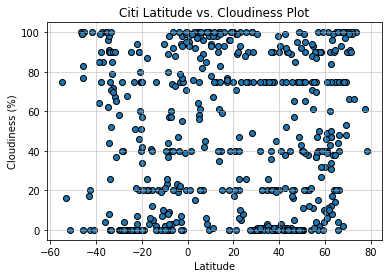

In [99]:
#creating scatter plot from clean_city_data_rel
plt.scatter(
    clean_city_data_rel["Lat"],
    clean_city_data_rel["Cloudiness"],
    marker="o",
    edgecolors="black",
    facecolors="#1f77b4")

# Adding x labels, y labels and grid
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Citi Latitude vs. Cloudiness Plot")
plt.grid(linestyle ="-", linewidth = 1, alpha = 0.5)

# Save and show the scatter plot graph
plt.savefig("../output_data/Lat_vs_Cloudiness_plot.png")
plt.show()

## Latitude vs. Wind Speed Plot

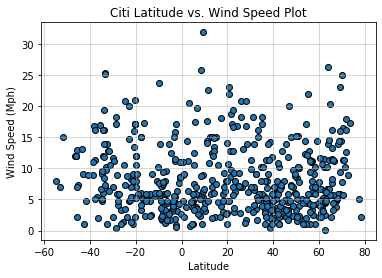

In [100]:
#creating scatter plot from clean_city_data_rel
plt.scatter(
    clean_city_data_rel["Lat"],
    clean_city_data_rel["Wind Speed"],
    marker="o",
    edgecolors="black",
    facecolors="#1f77b4")

# Adding x labels, y labels and grid
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (Mph)")
plt.title("Citi Latitude vs. Wind Speed Plot")
plt.grid(linestyle ="-", linewidth = 1, alpha = 0.5)

# Save and show the scatter plot graph
plt.savefig("../output_data/Lat_vs_Wind_Speed_plot.png")
plt.show()

## Linear Regression

In [101]:
# Creating Northern and Southern Hemisphere DataFrames, based on the Lat value
northern_hemisphere_df=clean_city_data_rel.loc[clean_city_data_rel["Lat"] >= 0]
southern_hemisphere_df=clean_city_data_rel.loc[clean_city_data_rel["Lat"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4948998487753302


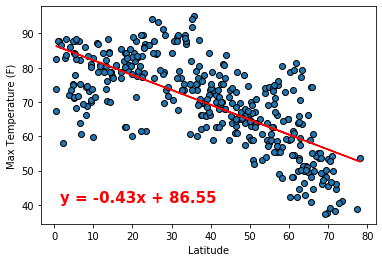

In [128]:
# Creating a function to create Linear Regression plots 

def LinearRegresion(x_values,y_values):
    # Adding the linear regression equation and line to the plot, 
    # and printing out the r-squared value along with the plot
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(60,60),fontsize=15,color="r", xycoords = "figure points", fontweight = "bold")
    plt.scatter(x_values,y_values, edgecolors="black")
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-squared is: {rvalue**2}")
    
    
# Calling the function
LinearRegresion(northern_hemisphere_df["Lat"],northern_hemisphere_df["Max Temp"])

# Adding x and y labels 
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save and show the scatter plot graph
plt.savefig("../output_data/NH_Lat_vs_Temp_regresion.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5427264693486036


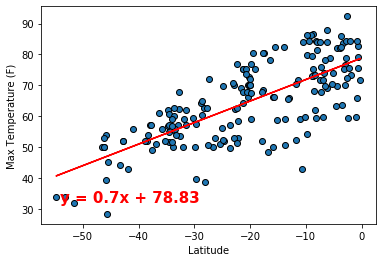

In [130]:
  
# Calling the function
LinearRegresion(southern_hemisphere_df["Lat"],southern_hemisphere_df["Max Temp"])

# Adding x and y labels 
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")


# Save and show the scatter plot graph
plt.savefig("../output_data/SH_Lat_vs_Temp_regresion.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.011158472162395745


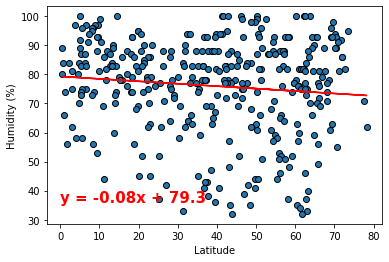

In [131]:
# Calling the function
LinearRegresion(northern_hemisphere_df["Lat"],northern_hemisphere_df["Humidity"])

# Adding x and y labels 
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save and show the scatter plot graph
plt.savefig("../output_data/NH_Lat_vs_Humidity_regresion.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0034593301900544006


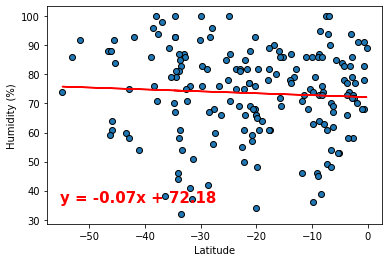

In [132]:
# Calling the function
LinearRegresion(southern_hemisphere_df["Lat"],southern_hemisphere_df["Humidity"])

# Adding x and y labels 
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save and show the scatter plot graph
plt.savefig("../output_data/SH_Lat_vs_Humidity_regresion.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.014534212506477405


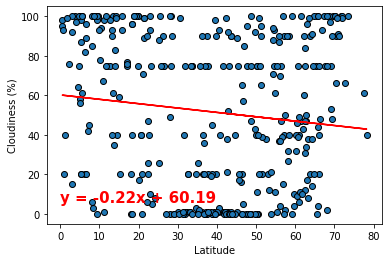

In [133]:
# Calling the function
LinearRegresion(northern_hemisphere_df["Lat"],northern_hemisphere_df["Cloudiness"])

# Adding x and y labels 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save and show the scatter plot graph
plt.savefig("../output_data/NH_Lat_vs_Cloudiness_regresion.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.016450017726242872


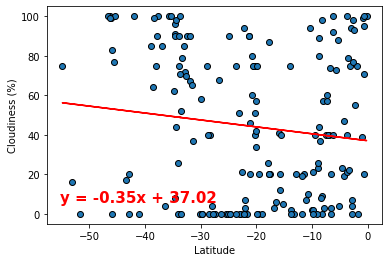

In [134]:
# Calling the function
LinearRegresion(southern_hemisphere_df["Lat"],southern_hemisphere_df["Cloudiness"])

# Adding x and y labels 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save and show the scatter plot graph
plt.savefig("../output_data/SH_Lat_vs_Cloudiness_regresion.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00042841920275207395


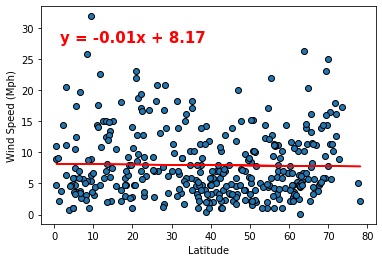

In [140]:

x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Wind Speed"]

# Adding the linear regression equation and line to the plot, 
# and printing out the r-squared value along with the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(60,220),fontsize=15,color="r", xycoords = "figure points", fontweight = "bold")
plt.scatter(x_values,y_values, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is: {rvalue**2}")





# Adding x and y labels 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (Mph)")

# Save and show the scatter plot graph
plt.savefig("../output_data/NH_Lat_vs_Wind Speed_regresion.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06870733437160395


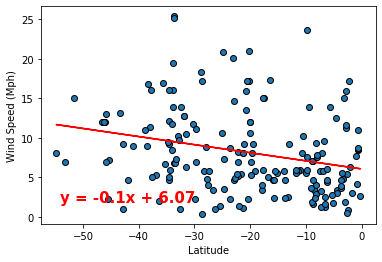

In [136]:
# Calling the function
LinearRegresion(southern_hemisphere_df["Lat"],southern_hemisphere_df["Wind Speed"])

# Adding x and y labels 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (Mph)")

# Save and show the scatter plot graph
plt.savefig("../output_data/SH_Lat_vs_Wind Speed_regresion.png")
plt.show()